In [191]:
import wikipedia
import pandas as pd
import numpy as np
import os
import sys
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


### Album release dates

1. Dark & Wild: August 19, 2014
2. Wings: October 10, 2016
3. Love Yourself: Tears: May 18, 2018
4. Map of the Soul: 7: February 21, 2020
5. Be: November 20, 2020

In [192]:
#get range
def date_range(release_date):
    '''
    Given a string with the album release date,
    calculates the given time range to extract data from
    '''
    date = pd.to_datetime(release_date)
    start = date - timedelta(days=2)
    end = date + timedelta(days = 14)
    return start, end
    

In [193]:
def read_lightdump(fp):
    '''
	Reads in n lightdump pages and returns a list of all titles 
    read and their corresponding data as a DataFrame
	:param fp: input filepath
	:param n: number of articles to read
	:return: list of article titles, list of corresponding article lightdump data as DataFrame
	'''
    
    with open(fp) as file:
        df = pd.DataFrame(columns = ['timestamp', 'revert', 'revision_id', 'length', 'user'])
        for line in file:
            if '^^^_' not in line:
                title = line.strip('\n').strip()

            else:
                data = line.strip("^^^_").strip('\n').split()
                row = pd.Series(dtype = 'object')

                row['timestamp'] = data[0]
                row['revert'] = int(data[1])
                row['revision_id'] = int(data[2])
                row['length'] = int(data[3])
                row['user'] = data[4]

                df = df.append(row, ignore_index = True)

    df['timestamp'] = pd.to_datetime(df['timestamp'])
    return title, df

In [194]:
#Check bts album time series data
fp = "../data/raw/light_dump/BTS_be_light_dump.txt"
title, df = read_lightdump(fp)


In [195]:
df.head()

,timestamp,revert,revision_id,length,user
0,2020-09-27 15:37:41+00:00,0,1,1944,Lirim.Z
1,2020-09-27 15:40:52+00:00,0,2,2341,Lirim.Z
2,2020-09-27 15:41:31+00:00,0,3,2351,Lirim.Z
3,2020-09-27 15:41:46+00:00,0,4,2352,Lirim.Z
4,2020-09-27 15:43:51+00:00,0,5,2352,Lirim.Z


### Album: Be

In [196]:
release_date = "November 20, 2020"

In [197]:
start, end = date_range(release_date)
start

Timestamp('2020-11-18 00:00:00')

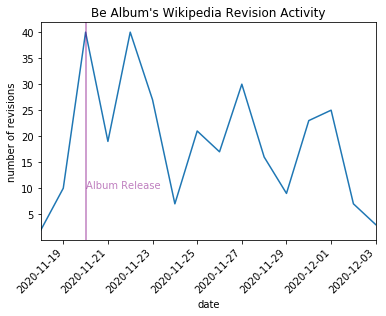

In [199]:
be = df
be.timestamp = pd.DatetimeIndex(pd.to_datetime(be.timestamp)).tz_localize(None)
filtered = be[(be.timestamp > start) & (be.timestamp < end)]

filtered = filtered.sort_values(by = 'timestamp', ascending = True)
filtered.timestamp = filtered.timestamp.apply(lambda x: x.date())
data = filtered.groupby(by = 'timestamp').count()

fig, ax = plt.subplots()
# display(data.user)
data.user.plot()
plt.ylabel('number of revisions')
plt.xlabel('date')
plt.xticks(rotation=45, ha="right")
plt.title('Be Album\'s Wikipedia Revision Activity')

x = release_date

ax.annotate('Album Release', xy = (x ,10), color='purple', alpha = 0.5)
ax.axvline(x, color='purple', alpha=0.5)

plt.show()

### revision length

In [200]:
fp = "../data/raw/light_dump/BTS_be_light_dump.txt"
fp = "../data/raw/light_dump/BTS_dark_wild_light_dump.txt"
fp = "../data/raw/light_dump/BTS_mots7_light_dump.txt"

title, df = read_lightdump(fp)

release_date = 'February 21, 2020'
start, end = date_range(release_date)

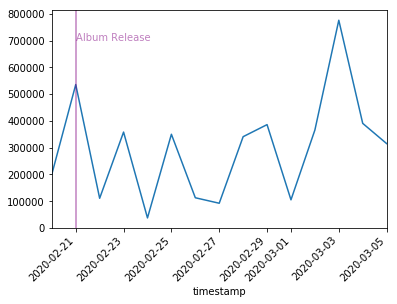

In [201]:
be = df

be.timestamp = pd.DatetimeIndex(pd.to_datetime(be.timestamp))
be.timestamp = be.timestamp.apply(lambda x: x.date())

filtered = be[(be.timestamp > start) & (be.timestamp < end)]

filtered = filtered.sort_values(by = 'timestamp', ascending = True)
data = filtered.groupby(by = 'timestamp').sum()

fig, ax = plt.subplots()

# be = be.set_index('timestamp')
data.length.plot()

plt.xticks(rotation=45, ha="right")

x = release_date
ax.annotate('Album Release', xy = (x ,700000), color='purple', alpha = 0.5)
ax.axvline(x, color='purple', alpha=0.5)

In [202]:
fp = "../data/raw/light_dump/All_Lives_Matter_light_dump.txt"
title, df = read_lightdump(fp)

date = 'June 15, 2020'
date = pd.to_datetime(date)
start = date - timedelta(days=15)
end = date + timedelta(days = 15)

print(start)
print(end)

2020-05-31 00:00:00
2020-06-30 00:00:00


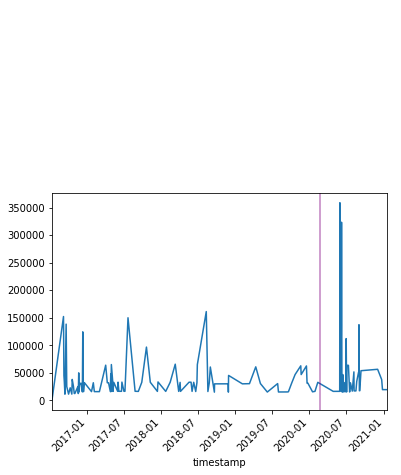

In [203]:
be = df

be.timestamp = pd.DatetimeIndex(pd.to_datetime(be.timestamp))
be.timestamp = be.timestamp.apply(lambda x: x.date())

data = be.groupby(by = 'timestamp').sum()

fig, ax = plt.subplots()
data.length.plot()
plt.xticks(rotation=45, ha="right")

x = release_date
ax.annotate('Album Release', xy = (x ,700000), color='purple', alpha = 0.5)
ax.axvline(x, color='purple', alpha=0.5)

### for all albums

In [204]:
files = [
    "../data/raw/light_dump/BTS_dark_wild_light_dump.txt",
    "../data/raw/light_dump/BTS_wings_light_dump.txt",
    "../data/raw/light_dump/BTS_love_yourself_light_dump.txt",
    "../data/raw/light_dump/BTS_mots7_light_dump.txt",
    "../data/raw/light_dump/BTS_be_light_dump.txt"
]

In [205]:
release_dates = {
    'Dark & Wild': 'August 19, 2014',
    'Wings (BTS album)': 'October 10, 2016',
    'Love Yourself: Tear': 'May 18, 2018',
    'Map of the Soul: 7': 'February 21, 2020',
    'Be (BTS album)': 'November 20, 2020'
}

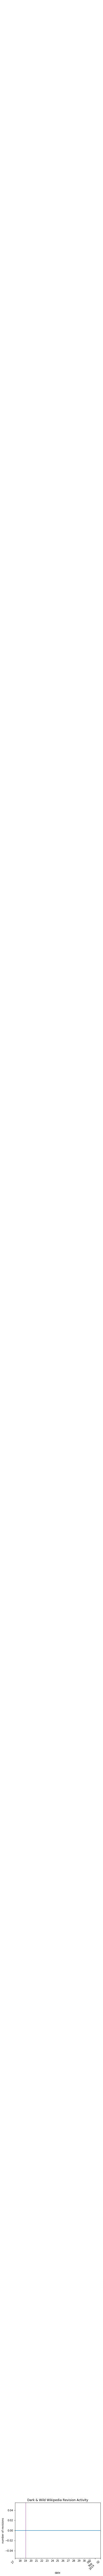

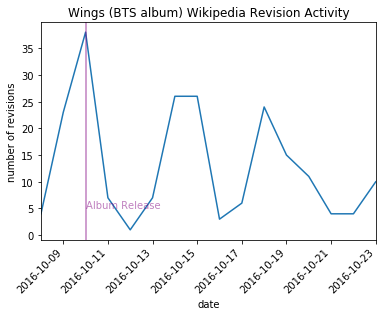

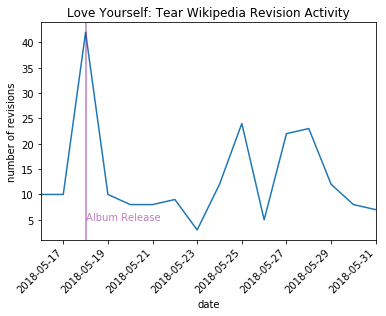

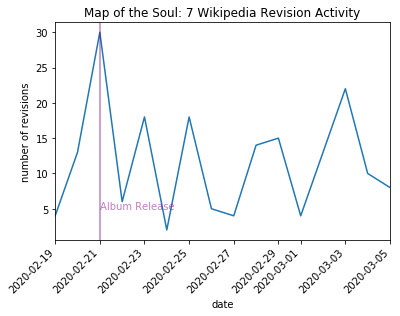

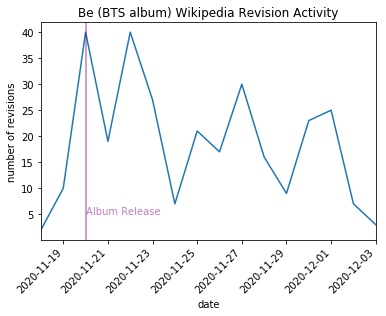

In [206]:
for fp in files:
    title, df = read_lightdump(fp)
    
    release_date = release_dates[title]
    start, end = date_range(release_date)
    
    df.timestamp = pd.DatetimeIndex(pd.to_datetime(df.timestamp)).tz_localize(None)
    filtered = df[(df.timestamp > start) & (df.timestamp < end)]
    filtered = filtered.sort_values(by = 'timestamp', ascending = True)
    filtered.timestamp = filtered.timestamp.apply(lambda x: x.date())
    data = filtered.groupby(by = 'timestamp').count()

    if data.shape[0] == 0:
        data = pd.DataFrame()
        data['timestamp'] = pd.date_range(start= start, end = end)
        data.timestamp = pd.to_datetime(data.timestamp)
        data['user'] = [0 for i in range(len(data.timestamp))]
        data = data.set_index('timestamp')

    fig, ax = plt.subplots()
    data.user.plot()
    plt.ylabel('number of revisions')
    plt.xlabel('date')
    plt.xticks(rotation=45, ha="right")
    plt.title(title + ' Wikipedia Revision Activity')

    x = release_date
    ax.annotate('Album Release', xy = (x , 5), color='purple', alpha = 0.5)
    ax.axvline(x, color='purple', alpha=0.5)

    plt.savefig("../data/eda/album_" + title + "wiki_activity.png")


In [207]:
def visualize_album_activity(fp, release_dates):
    '''
    Visualizes Wikipedia activity after album releases
    '''
    title, df = read_lightdump(fp)
    
    release_date = release_dates[title]
    start, end = date_range(release_date)
    
    df.timestamp = pd.DatetimeIndex(pd.to_datetime(df.timestamp)).tz_localize(None)
    filtered = df[(df.timestamp > start) & (df.timestamp < end)]
    filtered = filtered.sort_values(by = 'timestamp', ascending = True)
    filtered.timestamp = filtered.timestamp.apply(lambda x: x.date())
    data = filtered.groupby(by = 'timestamp').count()

    if data.shape[0] == 0:
        data = pd.DataFrame()
        data['timestamp'] = pd.date_range(start= start, end = end)
        data.timestamp = pd.to_datetime(data.timestamp)
        data['user'] = [0 for i in range(len(data.timestamp))]
        data = data.set_index('timestamp')

    fig, ax = plt.subplots()
    data.user.plot()
    plt.ylabel('number of revisions')
    plt.xlabel('date')
    plt.xticks(rotation=45, ha="right")
    plt.title(title + ' Wikipedia Revision Activity')

    x = release_date
    ax.annotate('Album Release', xy = (x , 5), color='purple', alpha = 0.5)
    ax.axvline(x, color='purple', alpha=0.5)

    plt.savefig("../data/eda/album_" + title + "_wiki_activity.png")
    

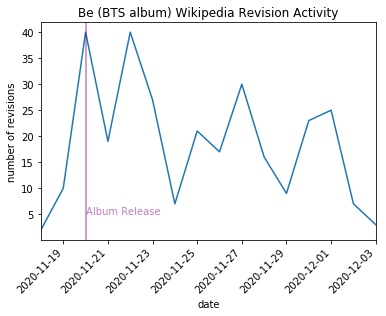

In [208]:
fp = "../data/raw/light_dump/BTS_wings_light_dump.txt"
fp = "../data/raw/light_dump/BTS_be_light_dump.txt"


visualize_album_activity(fp, release_dates)

### Number of reverts

In [212]:
fp = "../data/raw/light_dump/BTS_be_light_dump.txt"
title, df = read_lightdump(fp)

In [213]:
df.head()

,timestamp,revert,revision_id,length,user
0,2020-09-27 15:37:41+00:00,0,1,1944,Lirim.Z
1,2020-09-27 15:40:52+00:00,0,2,2341,Lirim.Z
2,2020-09-27 15:41:31+00:00,0,3,2351,Lirim.Z
3,2020-09-27 15:41:46+00:00,0,4,2352,Lirim.Z
4,2020-09-27 15:43:51+00:00,0,5,2352,Lirim.Z


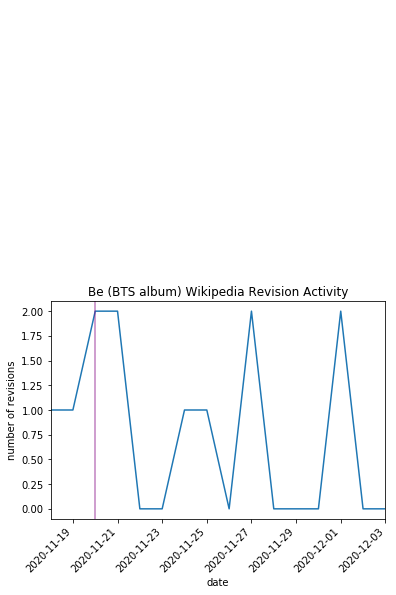

In [223]:
# visualize num reverts
release_date = release_dates[title]
start, end = date_range(release_date)

df.timestamp = pd.DatetimeIndex(pd.to_datetime(df.timestamp)).tz_localize(None)
filtered = df[(df.timestamp > start) & (df.timestamp < end)]
filtered = filtered.sort_values(by = 'timestamp', ascending = True)
filtered.timestamp = filtered.timestamp.apply(lambda x: x.date())
data = filtered.groupby(by = 'timestamp').sum()

fig, ax = plt.subplots()
data.revert.plot()
plt.ylabel('number of revisions')
plt.xlabel('date')
plt.xticks(rotation=45, ha="right")
plt.title(title + ' Wikipedia Revision Activity')

x = release_date
ax.annotate('Album Release', xy = (x , 5), color='purple', alpha = 0.5)
ax.axvline(x, color='purple', alpha=0.5)

plt.show()

In [228]:
def visualize_album_reverts(fp, release_dates):
    '''
    Visualizes Wikipedia activity after album releases
    '''
    title, df = read_lightdump(fp)
    
    release_date = release_dates[title]
    start, end = date_range(release_date)
    
    df.timestamp = pd.DatetimeIndex(pd.to_datetime(df.timestamp)).tz_localize(None)
    filtered = df[(df.timestamp > start) & (df.timestamp < end)]
    filtered = filtered.sort_values(by = 'timestamp', ascending = True)
    filtered.timestamp = filtered.timestamp.apply(lambda x: x.date())
    data = filtered.groupby(by = 'timestamp').sum()

    if data.shape[0] == 0:
        data = pd.DataFrame()
        data['timestamp'] = pd.date_range(start= start, end = end)
        data.timestamp = pd.to_datetime(data.timestamp)
        data['user'] = [0 for i in range(len(data.timestamp))]
        data = data.set_index('timestamp')

    fig, ax = plt.subplots()
    data.revert.plot()
    plt.ylabel('number of reverts')
    plt.xlabel('date')
    plt.xticks(rotation=45, ha="right")
    plt.title(title + ' Wikipedia Revert Activity')

    x = release_date
    ax.annotate('Album Release', xy = (x , 5), color='purple', alpha = 0.5)
    ax.axvline(x, color='purple', alpha=0.5)

    plt.savefig("../data/eda/album_" + title + "_wiki_reverts.png")
    

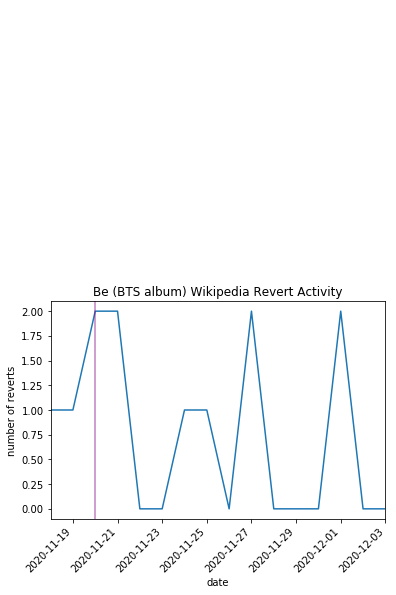

In [234]:
fp = "../data/raw/light_dump/BTS_be_light_dump.txt"
# fp = "../data/raw/light_dump/BTS_wings_light_dump.txt"
# fp = "../data/raw/light_dump/BTS_mots7_light_dump.txt"

visualize_album_reverts(fp, release_dates)

==========Scratch==========

In [147]:
release_date = "November 20, 2020"
release_date = pd.to_datetime(release_date).date()

In [169]:
#check bts main page time series data
fp = "../data/raw/light_dump/Kpop_ld.txt"
titles, dfs = lightdump_read_n(fp, 0)

In [170]:
titles[0]

'BTS'

In [172]:
bts = dfs[0]

In [173]:
bts.head()

,timestamp,revert,revision_id,user
0,2013-07-04 19:45:15+00:00,0,1,Hinorisakamachi
1,2013-07-04 19:47:39+00:00,0,2,Hinorisakamachi
2,2013-07-04 19:59:17+00:00,0,3,Hinorisakamachi
3,2013-07-04 19:59:53+00:00,0,4,Hinorisakamachi
4,2013-07-04 20:19:54+00:00,0,5,39.198.179.240


In [174]:

bts.timestamp = pd.DatetimeIndex(pd.to_datetime(bts.timestamp,unit='ms')).tz_localize(None)

In [176]:
bts

,timestamp,revert,revision_id,user
0,2013-07-04 19:45:15,0,1,Hinorisakamachi
1,2013-07-04 19:47:39,0,2,Hinorisakamachi
2,2013-07-04 19:59:17,0,3,Hinorisakamachi
3,2013-07-04 19:59:53,0,4,Hinorisakamachi
4,2013-07-04 20:19:54,0,5,39.198.179.240
...,...,...,...,...
995,2014-12-21 12:02:18,0,780,121.6.37.231
996,2014-12-21 17:32:02,0,781,49.144.223.122
997,2014-12-22 07:36:52,0,782,Exo-l
998,2014-12-23 05:38:08,0,783,99.64.240.60


In [175]:
bts[(bts.timestamp > start) & (bts.timestamp < end)]

,timestamp,revert,revision_id,user


In [96]:
bts.timestamp[0].tz_localize(None)

Timestamp('2013-07-04 19:45:15')

In [97]:
start

Timestamp('2014-08-17 00:00:00')